# Preparation

In [1]:
# Import of basic libraries for converting data from excel to a dataframe and libraries that provide functions to plot the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# TQDM provides progressbars
from tqdm import tqdm

# We some of the standard classifiers.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# We also import some preprocessing models. These will be used later
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA

# Import a set of standard classification metrics
from sklearn.metrics import accuracy_score, roc_auc_score, balanced_accuracy_score, f1_score, matthews_corrcoef, precision_score, recall_score, make_scorer

# We also import the functions for the cross-validation
from sklearn.model_selection import KFold, train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import TimeSeriesSplit, cross_validate

# Import Libraries for Resampling
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel

from imblearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

from scipy.stats import randint
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import f1_score, confusion_matrix
import numpy as np
from sklearn.model_selection import cross_val_predict

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Import dataset
path ="https://github.com/KingKai69/VisualAnalytics/raw/main/Automobile_data.csv"
df = pd.read_csv(path)
df.rename(columns={'symboling': 'risk-score'}, inplace=True)
df.head()

,risk-score,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
#col_names = list(df.columns)
#print(col_names)

In [5]:
#df.describe()

# Data Preprocessing

In [6]:
# Show the columns that contain nan
#df.isna().any()

In [3]:
# Interpolation of NaN Values
# Replace "?" with NaN
df.replace('?', float('nan'), inplace=True)
# Replace NaN values with mode of respective column
df_imp = df.fillna(df.mode().iloc[0])
df_imp.isna().any()

risk-score           False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

In [8]:
#df_imp.head()

## Label Encoding

In [4]:
# Evtl. alle Spalten codieren?

# Init new LabelEncoder Object
le = LabelEncoder()

# Init dataframe for encoded data
df_enc = df_imp.copy()

# Wenden Sie den LabelEncoder auf mehrere Spalten in Ihrem DataFrame an
columns_to_encode = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location','engine-type','num-of-cylinders','fuel-system']  # Liste mit den Spaltennamen
for column in columns_to_encode:
    df_enc[column] = le.fit_transform(df_enc[column])

df_enc.head()

,risk-score,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,161,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495
1,3,161,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500
2,1,161,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
# Changes dtypes of respective column from object to int64 respective float 64, important for XAI SHAP
for col in df_enc.columns:
    if df_enc[col].dtype == 'object':
        try:
            df_enc[col] = df_enc[col].astype('int64')
        except ValueError:
            try:
                df_enc[col] = df_enc[col].astype('float64')
            except ValueError:
                pass  # Wenn die Spalte nicht konvertiert werden kann, überspringen wir sie einfach

print(df_enc.dtypes)

risk-score             int64
normalized-losses      int64
make                   int64
fuel-type              int64
aspiration             int64
num-of-doors           int64
body-style             int64
drive-wheels           int64
engine-location        int64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type            int64
num-of-cylinders       int64
engine-size            int64
fuel-system            int64
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object


## Scaling

In [6]:
df_features = df_enc.drop(['risk-score'], axis=1)

# Init new Scaler
scaler = StandardScaler()

# Fit Scaler
scaled_data = scaler.fit_transform(df_features)

df_sc = pd.DataFrame(scaled_data, columns=df_features.columns)

df_sc['risk-score'] = df_enc['risk-score']

In [12]:
# Check for imbalance
pd.value_counts(df_imp['risk-score'])

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: risk-score, dtype: int64

In [7]:
# Create 3 label Classification
df_enc_3 = df_enc.copy()
df_enc_3['risk-score'] = df_enc_3['risk-score'].replace(3, 'high-risk')
df_enc_3['risk-score'] = df_enc_3['risk-score'].replace(2, 'high-risk')
df_enc_3['risk-score'] = df_enc_3['risk-score'].replace(1, 'medium-risk')
df_enc_3['risk-score'] = df_enc_3['risk-score'].replace(0, 'medium-risk')
df_enc_3['risk-score'] = df_enc_3['risk-score'].replace(-1, 'low-risk')
df_enc_3['risk-score'] = df_enc_3['risk-score'].replace(-2, 'low-risk')
pd.value_counts(df_enc_3['risk-score'])

medium-risk    121
high-risk       59
low-risk        25
Name: risk-score, dtype: int64

In [8]:
# Create list of features
features = [
    'normalized-losses',
    'make',
    'fuel-type',
    'aspiration',
    'num-of-doors',
    'body-style',
    'drive-wheels',
    'engine-location',
    'wheel-base',
    'length',
    'width',
    'height',
    'curb-weight',
    'engine-type',
    'num-of-cylinders',
    'engine-size',
    'fuel-system',
    'bore',
    'stroke',
    'compression-ratio',
    'horsepower',
    'peak-rpm',
    'city-mpg',
    'highway-mpg',
    'price',
]

<Axes: >

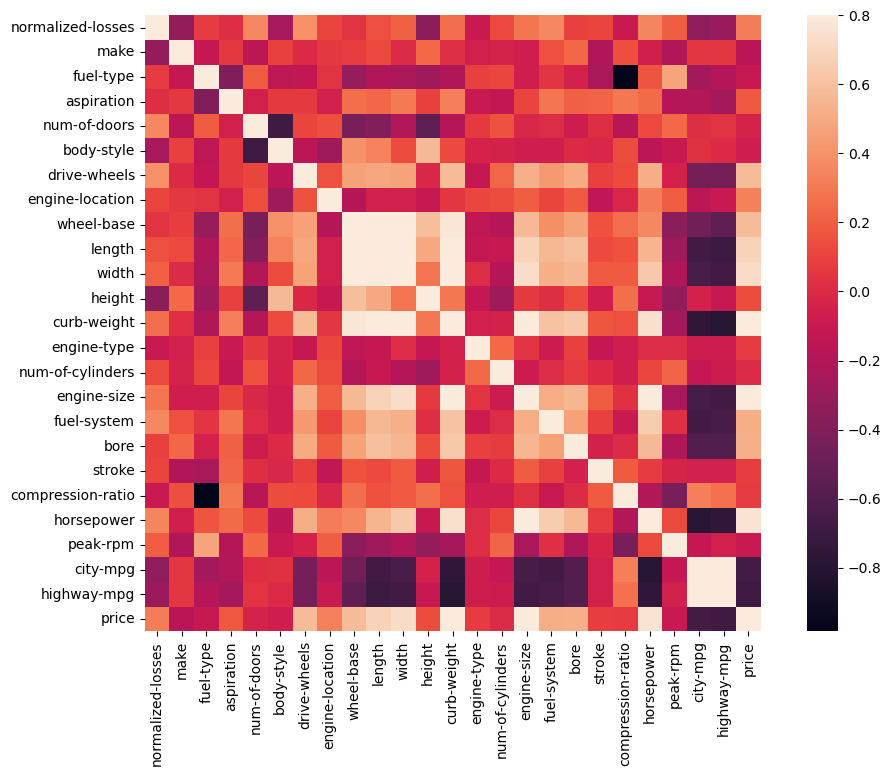

In [9]:
# Create Correlation matrix
Val = df_enc_3[features]
corrmat = Val.corr()
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corrmat, vmax=.8, square=True)

#print(corr_df)

In [9]:
# Create df with high correlated feature pairs
corrmat_masked = corrmat.mask(abs(corrmat) >= 1)

# Filtern der Korrelationen über 0,5 und unter -0,5
high_corr = corrmat_masked[(corrmat_masked > 0.7) | (corrmat_masked < -0.7)].stack().reset_index()
high_corr.columns = ['Feature_A', 'Feature_B', 'Correlation']

# Entfernen von Duplikaten
high_corr = high_corr[high_corr['Feature_A'] < high_corr['Feature_B']]

high_corr.head(n=120)

NameError: name 'corrmat' is not defined

# Modelling

In [11]:
# Create list of features
features_nonCor = [
    #'normalized-losses',
    'make',
    'fuel-type',
    'aspiration',
    'num-of-doors',
    'body-style',
    'drive-wheels',
    'engine-location',
    #'wheel-base',
    #'length',
    'width',
    'height',
    #'curb-weight',
    'engine-type',
    'num-of-cylinders',
    #'engine-size',
    'fuel-system',
    'bore',
    'stroke',
    #'compression-ratio',
    'horsepower',
    'peak-rpm',
    #'city-mpg',
    #'highway-mpg',
    #'price',
]

In [12]:
# Fixing the SEED
SEED = 27

In [13]:
# Define X and Y Data
x_data = df_enc_3[features_nonCor]
y_data = df_enc_3['risk-score']

x_data_s = df_sc[features_nonCor]
y_data_s = df_sc['risk-score']

In [19]:
# Train Test Split for non scaled data
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=SEED, stratify=y_data)

# Train Test for scaled data
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(x_data_s, y_data_s, test_size=0.25, random_state=SEED, stratify=y_data)

In [17]:
print(y_test)

104      high-risk
130    medium-risk
102    medium-risk
149    medium-risk
30       high-risk
179      high-risk
175       low-risk
178      high-risk
67        low-risk
167      high-risk
120    medium-risk
45     medium-risk
91     medium-risk
155    medium-risk
54     medium-risk
57       high-risk
154    medium-risk
196       low-risk
136      high-risk
33     medium-risk
108    medium-risk
12     medium-risk
97     medium-risk
128      high-risk
46       high-risk
165    medium-risk
23     medium-risk
201       low-risk
41     medium-risk
2      medium-risk
61     medium-risk
69     medium-risk
199       low-risk
20     medium-risk
35     medium-risk
188      high-risk
59     medium-risk
7      medium-risk
3        high-risk
80       high-risk
143    medium-risk
132      high-risk
177       low-risk
100    medium-risk
112    medium-risk
98       high-risk
5        high-risk
115    medium-risk
142    medium-risk
47     medium-risk
75     medium-risk
16     medium-risk
Name: risk-s

In [21]:
labels = ['high-risk', 'medium-risk', 'low-risk']

# Initialisiere Zähler für jeden Begriff
zaehler = {label: 0 for label in labels}

# Zähle das Vorkommen der Begriffe in der Liste
for element in y_test:
    if element in zaehler:
        zaehler[element] += 1

# Ergebnis ausgeben
for begriff, anzahl in zaehler.items():
    anteil = anzahl / len(y_test)
    print(f"Der Begriff '{begriff}' kommt {anzahl} mal vor. Anteil: {anteil:.2%}")

Der Begriff 'high-risk' kommt 15 mal vor. Anteil: 28.85%
Der Begriff 'medium-risk' kommt 31 mal vor. Anteil: 59.62%
Der Begriff 'low-risk' kommt 6 mal vor. Anteil: 11.54%


In [22]:
# KFold Train / Validation Split
kf_cv = KFold(n_splits = 5, shuffle = True, random_state=SEED)

# Spot Checking

In [23]:
# Definitions of metric
scorings = {
    'f1_score': make_scorer(f1_score, average='weighted', zero_division=1), 
    'mcc': make_scorer(matthews_corrcoef),
    }

In [24]:
# Definition of models for spot checking
def get_models():
    models=[
       ('Decision Tree',DecisionTreeClassifier(random_state = SEED)),
       ('Random Forest',RandomForestClassifier(random_state = SEED)),
       ('Extremely Randomized Trees',ExtraTreesClassifier(random_state = SEED)),
       ('Ada Boost',AdaBoostClassifier(random_state = SEED)),
       ('Gradient Boosting',GradientBoostingClassifier(random_state = SEED)),
       ('Support Vector Machine', SVC()),   
       ('Naive Bayes', GaussianNB()),    
       ('KNN', KNeighborsClassifier()),    
       ('Support Vector Machine', SVC()),
       ('Multilayer Perceptron',MLPClassifier(random_state = SEED)),
    ]
    return models

In [25]:
# Get our set of different models for the spot checking
models = get_models()

# Empty list to print the results as a nice table
all_cv_scores = []

# We will iter through our list of models
# We will perform the full cross validate run using the current model
for name, clf in tqdm(models):
    
    # We want to improve the printing of our results
    # Therefore we add all the values into a dictionary which we will format for later printing using Pandas 
    formatted_result = {}
    formatted_result['Classifier'] = name

    # Use the simple cross_validate wrapper greatly simplifies the spot checking. We will just compare the models using our 
    cv_score  = cross_validate(estimator = clf, X = X_train, y = y_train, cv = kf_cv, scoring = scorings)

    # cv scores contains the arrays with the score for the current scoring function
    # We will calculate the mean and std and add them to the formatted result dictionary
    for score_name, scores in cv_score.items():
        # Add the completely prepared string 
        formatted_result[f'{score_name}_mean'] = np.mean(scores)
        formatted_result[f'{score_name}_std'] = np.std(scores)
        
        #formatted_result[f'{score_name}'] = scores # We could also add the raw data to the dataframe. However this will make is less readable

    # We need to add the final rows of our results to an overall list.
    # This simplifies the creation of the dataframe
    all_cv_scores.append(formatted_result)

 50%|█████     | 5/10 [00:02<00:03,  1.50it/s]

: 

: 

In [ ]:
pd.DataFrame(all_cv_scores)

,Classifier,fit_time_mean,fit_time_std,score_time_mean,score_time_std,test_f1_score_mean,test_f1_score_std
0,Decision Tree,0.002607,0.002199,0.001348,0.000343,0.844012,0.044585
1,Random Forest,0.070888,0.002627,0.005386,0.001268,0.871804,0.041884
2,Extremely Randomized Trees,0.052237,0.000575,0.004746,0.000067,0.897173,0.057091
3,Ada Boost,0.036888,0.000598,0.003834,0.000037,0.633838,0.086607
4,Gradient Boosting,0.155974,0.006628,0.001976,0.000340,0.854104,0.039675
5,Support Vector Machine,0.003259,0.001534,0.001704,0.000182,0.439160,0.053730
6,Naive Bayes,0.001077,0.000066,0.001190,0.000043,0.692394,0.028611
7,KNN,0.000954,0.000025,0.012673,0.017846,0.522651,0.047000
8,Support Vector Machine,0.002209,0.000113,0.001703,0.000129,0.439160,0.053730
9,Multilayer Perceptron,0.038092,0.025263,0.003253,0.002870,0.422670,0.103421


In [ ]:
# SPOT Checking with Scaling

# Get our set of different models for the spot checking
models = get_models()

# Empty list to print the results as a nice table
all_cv_scores_s = []

# We will iter through our list of models
# We will perform the full cross validate run using the current model
for name, clf in tqdm(models):
    
    # We want to improve the printing of our results
    # Therefore we add all the values into a dictionary which we will format for later printing using Pandas 
    formatted_result = {}
    formatted_result['Classifier'] = name

    # Use the simple cross_validate wrapper greatly simplifies the spot checking. We will just compare the models using our 
    cv_score  = cross_validate(estimator = clf, X = x_data_s, y = y_data_s, cv = kf_cv, scoring = scorings)

    # cv scores contains the arrays with the score for the current scoring function
    # We will calculate the mean and std and add them to the formatted result dictionary
    for score_name, scores in cv_score.items():
        # Add the completely prepared string 
        formatted_result[f'{score_name}_mean'] = np.mean(scores)
        formatted_result[f'{score_name}_std'] = np.std(scores)
        
        #formatted_result[f'{score_name}'] = scores # We could also add the raw data to the dataframe. However this will make is less readable

    # We need to add the final rows of our results to an overall list.
    # This simplifies the creation of the dataframe
    all_cv_scores_s.append(formatted_result)

 50%|█████     | 5/10 [00:02<00:03,  1.57it/s]/Users/corneliusfichtner/opt/anaconda3/envs/MDF/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/corneliusfichtner/opt/anaconda3/envs/MDF/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/corneliusfichtner/opt/anaconda3/envs/MDF/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/corneliusfichtner/opt/anaconda3/envs/MDF/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stoch

In [ ]:
pd.DataFrame(all_cv_scores_s)

,Classifier,fit_time_mean,fit_time_std,score_time_mean,score_time_std,test_f1_score_mean,test_f1_score_std
0,Decision Tree,0.001819,0.000416,0.001179,0.000142,0.781014,0.033653
1,Random Forest,0.071410,0.001633,0.004664,0.000144,0.775134,0.039817
2,Extremely Randomized Trees,0.052973,0.000550,0.004624,0.000050,0.798222,0.060912
3,Ada Boost,0.034048,0.000455,0.003744,0.000087,0.439669,0.088517
4,Gradient Boosting,0.281487,0.021251,0.001677,0.000163,0.776857,0.069562
5,Support Vector Machine,0.002186,0.000155,0.001418,0.000026,0.614271,0.064043
6,Naive Bayes,0.000875,0.000025,0.001043,0.000020,0.353027,0.041002
7,KNN,0.000754,0.000029,0.003511,0.000711,0.559634,0.053647
8,Support Vector Machine,0.002256,0.000044,0.001522,0.000029,0.614271,0.064043
9,Multilayer Perceptron,0.113346,0.010332,0.001294,0.000061,0.674899,0.052667


# Hyperparametertuning

In [ ]:
#Init best model for hyperparametertuning
model = ExtraTreesClassifier(random_state = SEED)

# define parameter space
param_dist = {
              'n_estimators': randint(50, 500),
              "criterion": ["gini", "entropy", 'log_loss'],
              "max_depth": randint(1, 21),
              #"min_samples_split": randint(2, 11),
              #"min_samples_leaf": randint(1, 11),
              "max_features": ["sqrt", "log2", None], 
              "bootstrap": [True, False],
              }

# Init optimizer
hyperparam_optimizer = RandomizedSearchCV(estimator = model, # The estimator or pipeline we want to optimize
                                          param_distributions = param_dist, # Our parameter grid
                                          n_iter = 10, # Searches for 10 random combinations
                                          n_jobs = -1, # Use all available CPU cores
                                          scoring = "f1_weighted", # Name of the scorer used for 
                                          cv = kf_cv # The CrossValidation to use
                                          )

In [ ]:
# fit the randomized search object to the training data
hyperparam_optimizer.fit(x_data, y_data)

# print best parameters and score
print("Best parameters found: ", hyperparam_optimizer.best_params_)
print("Best F1 score found: ", hyperparam_optimizer.best_score_)

Best parameters found:  {'bootstrap': False, 'criterion': 'gini', 'max_depth': 18, 'max_features': 'sqrt', 'n_estimators': 374}
Best F1 score found:  0.8920994019672307


# Final Evaluation 5 Fold cross validated (seen data)

In [28]:
print(clf_final)

ExtraTreesClassifier(class_weight='balanced', criterion='entropy', max_depth=19,
                     n_estimators=117, random_state=27)


Durchschnittlicher F1-Score: 0.86


Text(70.72222222222221, 0.5, 'Actual')

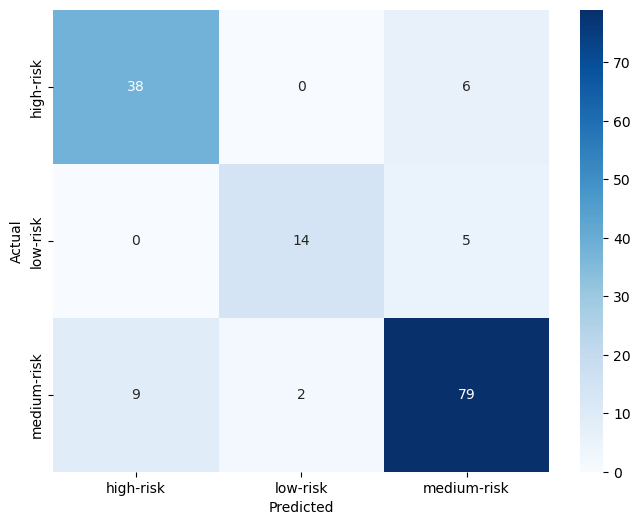

In [31]:
# Init new classifier with best setting of Hyperparameters
clf_final = ExtraTreesClassifier(n_estimators=117, criterion="entropy", max_depth=19 , class_weight='balanced', random_state = SEED)

scoring = {'f1_score': make_scorer(f1_score, average='weighted', zero_division=1)}

cv_final = cross_validate(estimator = clf_final, X = X_train, y = y_train, cv = kf_cv, scoring = scoring)

f1_scores = cv_final['test_f1_score']

# Durchschnittlichen F1-Score berechnen
mean_f1_score = np.mean(f1_scores)

# Confusion-Matrix berechnen
y_pred_cv = cross_val_predict(clf_final, X_train, y_train, cv=kf_cv)
cm_cv = confusion_matrix(y_train, y_pred_cv)

# Ergebnisse ausgeben
print("Durchschnittlicher F1-Score: {:.2f}".format(mean_f1_score))
#print("Confusion-Matrix:\n", conf_mat)

# Plot Confusion Matrix
#cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['high-risk', 'low-risk', 'medium-risk'])
#cm_display.plot()

#cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cv, annot=True, cmap='Blues', fmt='d', xticklabels=['high-risk','low-risk','medium-risk'], yticklabels=['high-risk','low-risk','medium-risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Final Evaluation of unseen test data

In [25]:
# Fit the model
clf_final.fit(X_train, y_train)

# Create predictions
y_pred = clf_final.predict(X_test)

# Calculate F1score
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
print("F1-Score:", f1)

F1-Score: 0.8389815312892236


Text(70.72222222222221, 0.5, 'Actual')

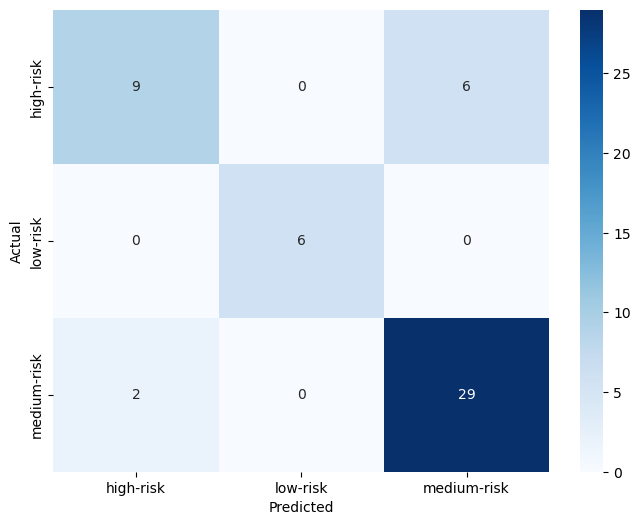

In [26]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=clf_final.classes_, yticklabels=clf_final.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Explainable AI

In [ ]:
df_results = pd.DataFrame({'Test Labels': y_data, 'Predicted Labels': y_pred})
df_results.head()

,Test Labels,Predicted Labels
0,high-risk,high-risk
1,high-risk,high-risk
2,medium-risk,high-risk
3,high-risk,medium-risk
4,high-risk,medium-risk


In [ ]:
df_pred_res = pd.DataFrame({'Test Label': y_test, 'Prediction Label': y_pred})
def_pred_res_fil = df_pred_res[df_pred_res['Test Label'] != df_pred_res['Prediction Label']]

def_pred_res_fil.head(n=50)

,Test Label,Prediction Label
12,medium-risk,high-risk
77,high-risk,medium-risk
9,medium-risk,high-risk
166,medium-risk,high-risk
76,high-risk,medium-risk
129,medium-risk,high-risk
165,medium-risk,high-risk
78,high-risk,medium-risk


# SHAP

In [ ]:
import shap

In [ ]:
# Modelling
clf_final = ExtraTreesClassifier(n_estimators=117, criterion="entropy", max_depth=19 , class_weight='balanced', random_state = SEED)
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=SEED)
clf_final.fit(X_train, y_train)
y_pred = clf_final.predict(X_test)

In [ ]:
print(clf_final.classes_)

['high-risk' 'low-risk' 'medium-risk']


In [ ]:
##### Compute SHAP values #####
#explainer = shap.Explainer(clf_final, X_train)
#shap_values = explainer(X_test)

explainer_tree = shap.TreeExplainer(clf_final) #Conditional Expectation --> unrealistische Dateninstanzen
shap_values_tree = explainer_tree.shap_values(X_test) ##Nochmal schauen welche Daten (Test, Train, alle) wirklich relevant sind
shap_single = explainer_tree.shap_values(X_test.iloc[0,:])

#SHAP Resampling

In [ ]:
print(len(features_nonCor))

19


In [ ]:
print(len(shap_values_tree[0][0]))
print(shap_values_tree[0][0])
#print(shap_values_tree.dtype)

19
[-5.37681986e-03  3.73405047e-03  8.71094059e-03  2.54398904e-01
  1.29967740e-01  3.55408389e-03 -9.81463733e-04  7.92924951e-02
  3.09062468e-02  1.33702561e-02  5.34579058e-02  1.90899738e-02
  2.03138139e-03  3.07496324e-02  2.50933277e-02  5.18650560e-03
  2.99667905e-03 -2.91723597e-05  1.05139996e-02]


In [ ]:
print(clf_final.classes_)

['high-risk' 'low-risk' 'medium-risk']


In [ ]:
index = 0
print(list(y_test)[index])
print(list(y_pred)[index])

low-risk
low-risk


In [ ]:
shap.initjs()
# Explain Single prediction from test set
shap.force_plot(explainer_tree.expected_value[0], shap_single[0], X_test.iloc[1,:])

In [ ]:
shap.force_plot(explainer_tree.expected_value[1], shap_single[1], X_test.iloc[1,:])

In [ ]:
shap.force_plot(explainer_tree.expected_value[2], shap_single[2], X_test.iloc[1,:])

The bold value is the models score for this observation
red representing features that pushed the model score higher, and blue representing features that pushed the score lower.
Features that had more of an impact on the score are located closer to the dividing boundary between red and blue, and the size of that impact is represented by the size of the bar.

In [ ]:
shap.initjs()
shap.force_plot(explainer_tree.expected_value[0], shap_values_tree[0])

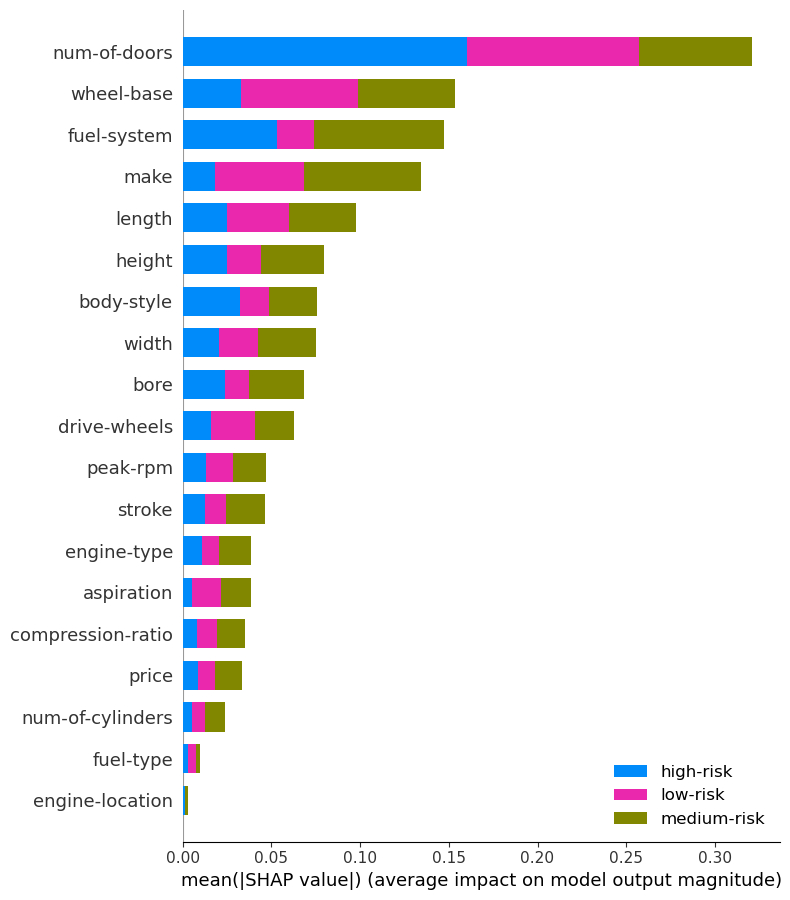

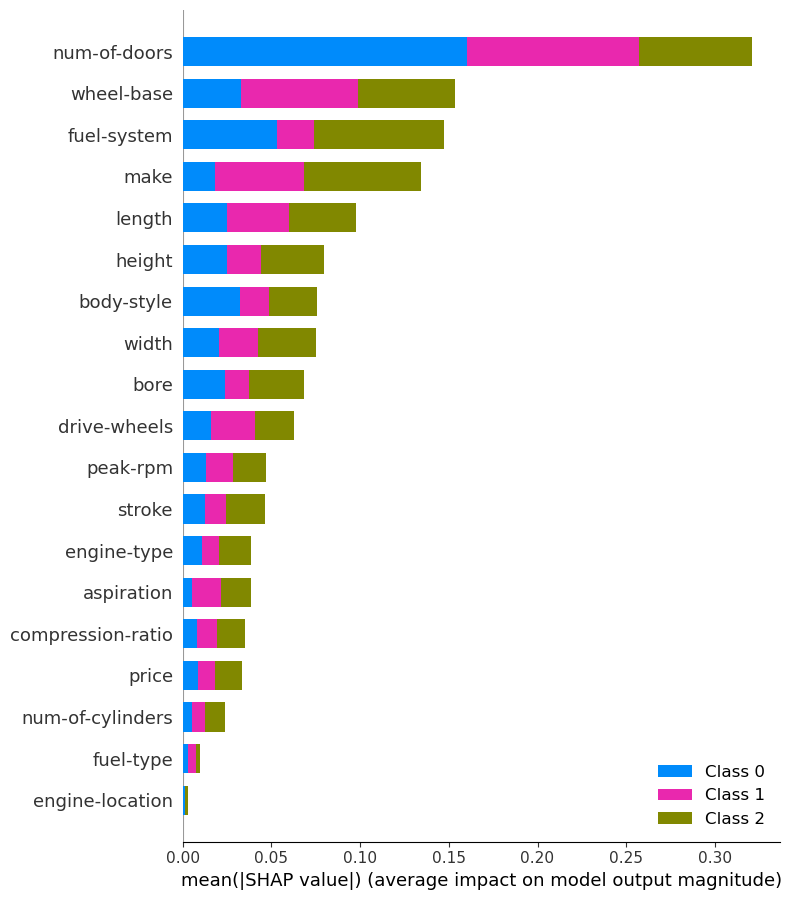

In [ ]:
shap.summary_plot(shap_values_tree, X_test, class_inds="original", class_names=clf_final.classes_)
shap.summary_plot(shap_values_tree, X_test, class_inds="original")

In [ ]:
print(len(X_test))
print(len(shap_values_tree[0]))

41
41


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


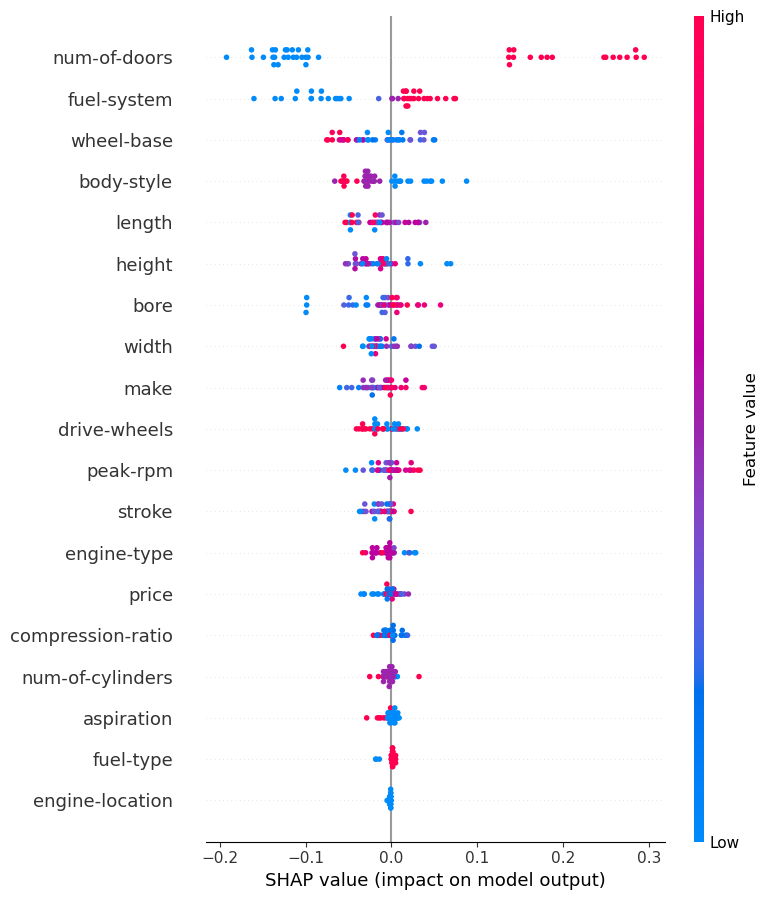

In [ ]:
# Summary Plot einer bestimmten Klasse
shap.summary_plot(shap_values_tree[0], X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


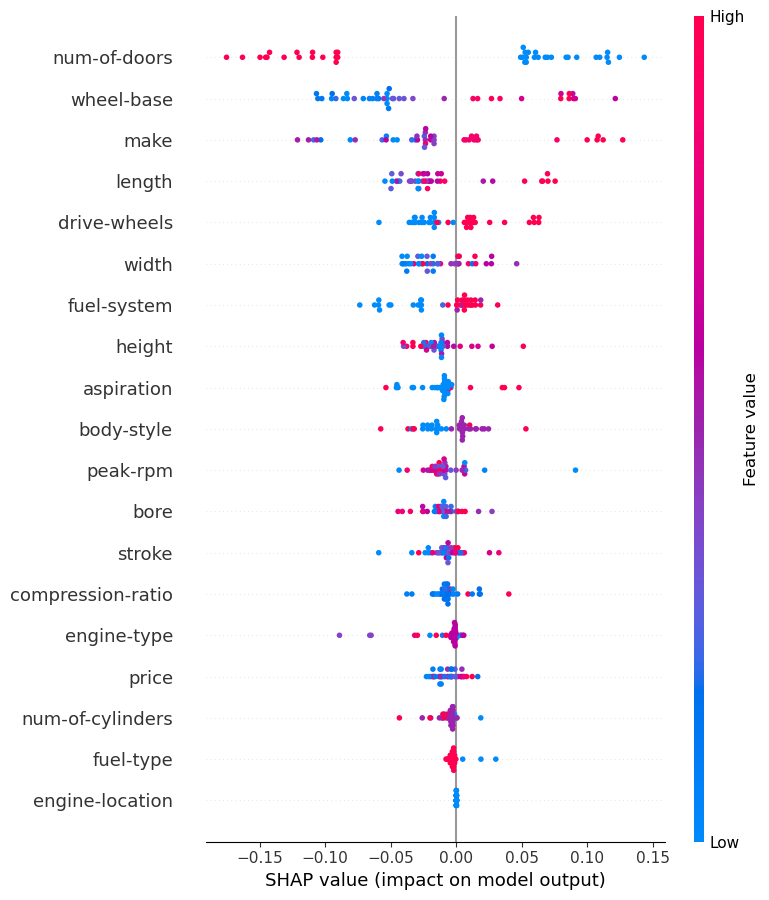

In [ ]:
shap.summary_plot(shap_values_tree[1], X_test)

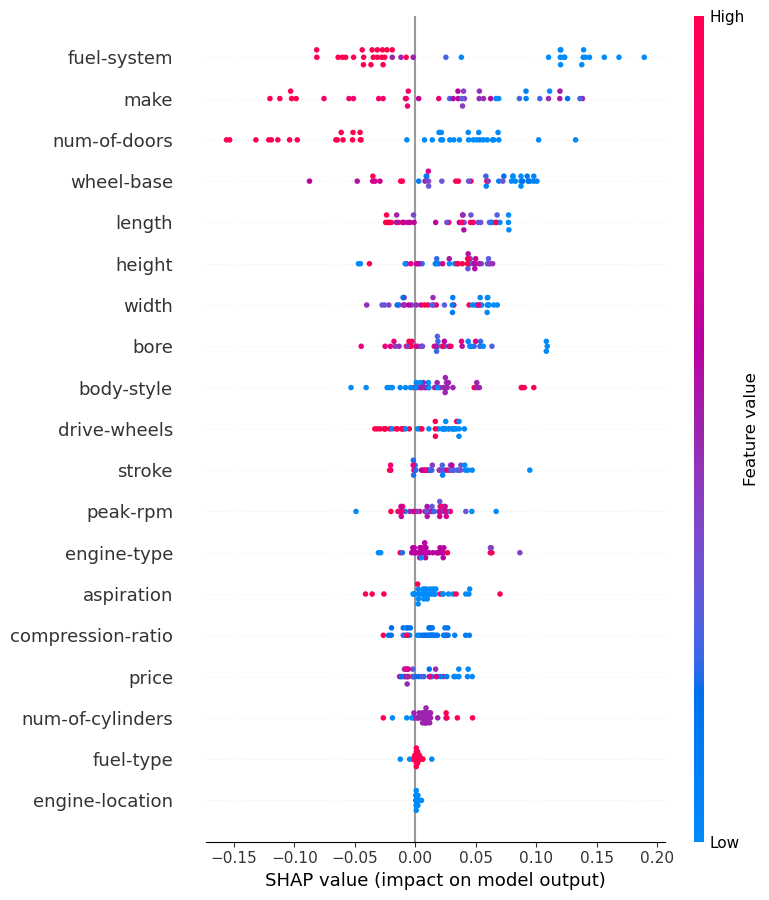

In [ ]:
shap.summary_plot(shap_values_tree[2], X_test)

In [ ]:
print(len(X_test))
print(len(shap_values_tree[0]))

41
41


In [ ]:
shap.multioutput_decision_plot(explainer_tree.expected_value[0], shap_values_tree[0], X_test.iloc[0,:])

ValueError: The base_values and shap_values args expect lists.

In [ ]:
print(len(X_test))
print(len(shap_values_tree[0]))

41
41


In [ ]:
for name in X_test.columns:
    shap.dependence_plot(name, shap_values_tree[0], X_test)

TypeError: order must be str, not int